<a href="https://colab.research.google.com/github/Nihal108-bi/Nihal-AI-ML-Practice-Hub/blob/main/Pneumonia_Detection_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Detection Using Deep Learning

 1. Download the dataset
 2. Use the dataset to train our model
 3. Download our best model
 4. Create a flask app
 5. frontend<Backend<Model

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content

!unzip /content/chest-xray-pneumonia.zip -d /content/chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/

In [ ]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import skimage
import skimage.segmentation
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
labels=['PNEUMONIA','NORMAL']
img_size=128

def get_data(data_dir):
  data=[]
  for label in labels:
    path=os.path.join(data_dir,label)
    class_num=labels.index(label)  #0/1
    for img in os.listdir(path):
      try:
        img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        if img_arr is None:
          continue  #skip image if there is any issue
        resized_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([resized_arr,class_num])  #data =[[......,0/1],[.....,0/1]]

      except Exception as e:
        print(f"Error in processing {img}:{e}")
  return data


In [ ]:
train=get_data("/content/chest-xray-pneumonia/chest_xray/train")
test=get_data("/content/chest-xray-pneumonia/chest_xray/test")
val=get_data("/content/chest-xray-pneumonia/chest_xray/val")

In [ ]:
train[1]

[array([[194, 179, 145, ...,  17,  18,  18],
        [195, 177, 152, ...,  24,  25,  26],
        [170, 150, 155, ...,  22,  26,  25],
        ...,
        [ 19,  18,  18, ...,  29,  29,  29],
        [ 20,  19,  18, ...,  29,  29,  29],
        [ 19,  20,  20, ...,  28,  28,  29]], dtype=uint8),
 0]

In [ ]:
train[8]

[array([[ 0,  0,  0, ..., 25, 19,  9],
        [ 0,  0,  0, ..., 20, 14, 11],
        [ 0,  0,  0, ..., 20, 16,  9],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 0]

In [ ]:
pneumonia_dir="/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA"

In [ ]:
pneumonia=os.listdir("/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA")
pneumonia

['person833_virus_1469.jpeg',
 'person299_bacteria_1416.jpeg',
 'person550_bacteria_2308.jpeg',
 'person937_bacteria_2862.jpeg',
 'person1371_virus_2362.jpeg',
 'person27_bacteria_137.jpeg',
 'person711_bacteria_2612.jpeg',
 'person267_bacteria_1251.jpeg',
 'person1313_bacteria_3320.jpeg',
 'person1109_bacteria_3050.jpeg',
 'person1426_bacteria_3667.jpeg',
 'person1938_bacteria_4854.jpeg',
 'person807_virus_1441.jpeg',
 'person463_bacteria_1971.jpeg',
 'person974_virus_1649.jpeg',
 'person1716_bacteria_4533.jpeg',
 'person1320_bacteria_3350.jpeg',
 'person1637_bacteria_4339.jpeg',
 'person146_virus_296.jpeg',
 'person1068_bacteria_3002.jpeg',
 'person33_bacteria_174.jpeg',
 'person1007_virus_1690.jpeg',
 'person1550_bacteria_4051.jpeg',
 'person325_virus_664.jpeg',
 'person736_virus_1358.jpeg',
 'person1923_bacteria_4831.jpeg',
 'person556_virus_1096.jpeg',
 'person1183_bacteria_3131.jpeg',
 'person780_virus_1411.jpeg',
 'person619_bacteria_2490.jpeg',
 'person1062_bacteria_2996.jpeg',

In [ ]:
len(pneumonia)

3876

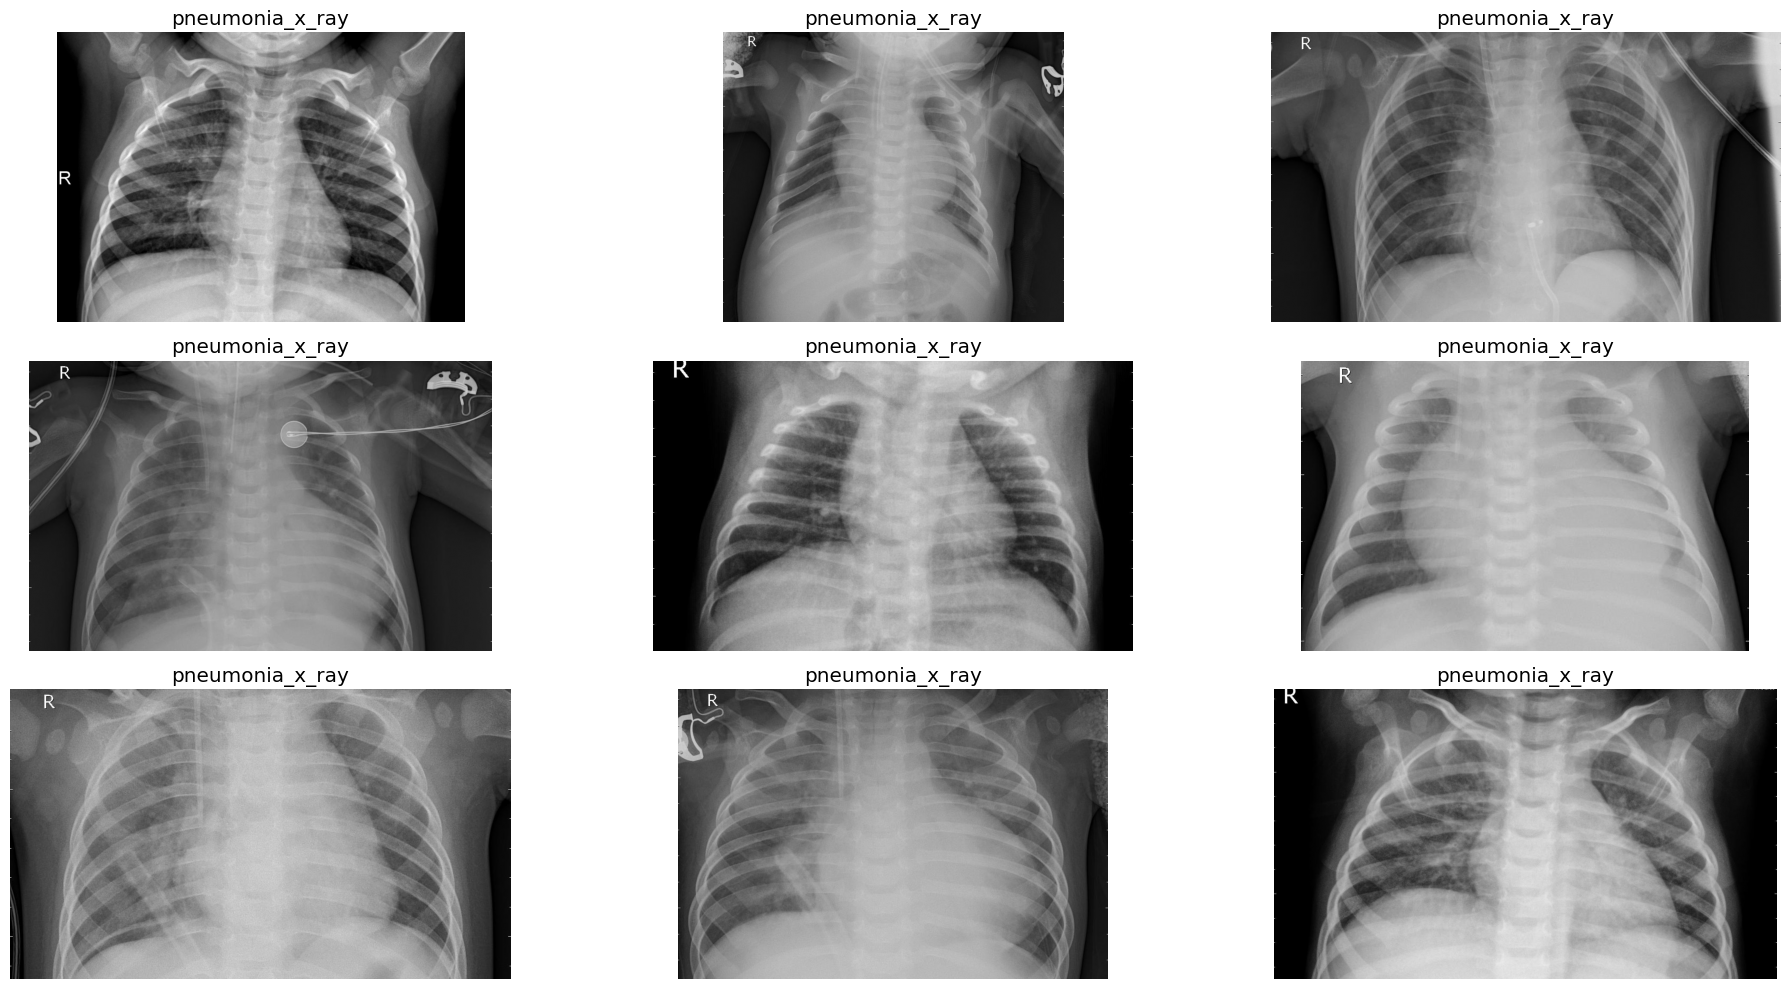

In [ ]:
plt.figure(figsize=(20,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  img=plt.imread(os.path.join(pneumonia_dir,pneumonia[i]))
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  plt.title("pneumonia_x_ray")
plt.tight_layout()

In [ ]:
Normal_dir="/content/chest-xray-pneumonia/chest_xray/train/NORMAL"

Normal=os.listdir("/content/chest-xray-pneumonia/chest_xray/train/NORMAL")
Normal

['NORMAL2-IM-1302-0001.jpeg',
 'IM-0544-0001.jpeg',
 'IM-0487-0001.jpeg',
 'IM-0288-0001.jpeg',
 'NORMAL2-IM-1273-0001.jpeg',
 'NORMAL2-IM-1345-0001-0002.jpeg',
 'NORMAL2-IM-0383-0001.jpeg',
 'IM-0728-0001.jpeg',
 'NORMAL2-IM-1261-0001.jpeg',
 'NORMAL2-IM-1127-0001.jpeg',
 'IM-0508-0001.jpeg',
 'NORMAL2-IM-0418-0001.jpeg',
 'NORMAL2-IM-0936-0001.jpeg',
 'NORMAL2-IM-0587-0001-0002.jpeg',
 'NORMAL2-IM-1056-0001.jpeg',
 'NORMAL2-IM-0536-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0681-0001.jpeg',
 'IM-0733-0001.jpeg',
 'IM-0722-0001.jpeg',
 'NORMAL2-IM-1111-0001.jpeg',
 'NORMAL2-IM-1282-0001.jpeg',
 'IM-0631-0001-0002.jpeg',
 'NORMAL2-IM-0428-0001.jpeg',
 'NORMAL2-IM-0493-0001.jpeg',
 'IM-0324-0001.jpeg',
 'IM-0496-0001.jpeg',
 'IM-0278-0001.jpeg',
 'NORMAL2-IM-0473-0001.jpeg',
 'NORMAL2-IM-0650-0001.jpeg',
 'NORMAL2-IM-0980-0001.jpeg',
 'NORMAL2-IM-0465-0001.jpeg',
 'NORMAL2-IM-0946-0001.jpeg',
 'NORMAL2-IM-1147-0001.jpeg',
 'NORMAL2-IM-0653-0001.jpeg',
 'NORMAL2-IM-0882-0001.jpeg',
 'NORMAL2

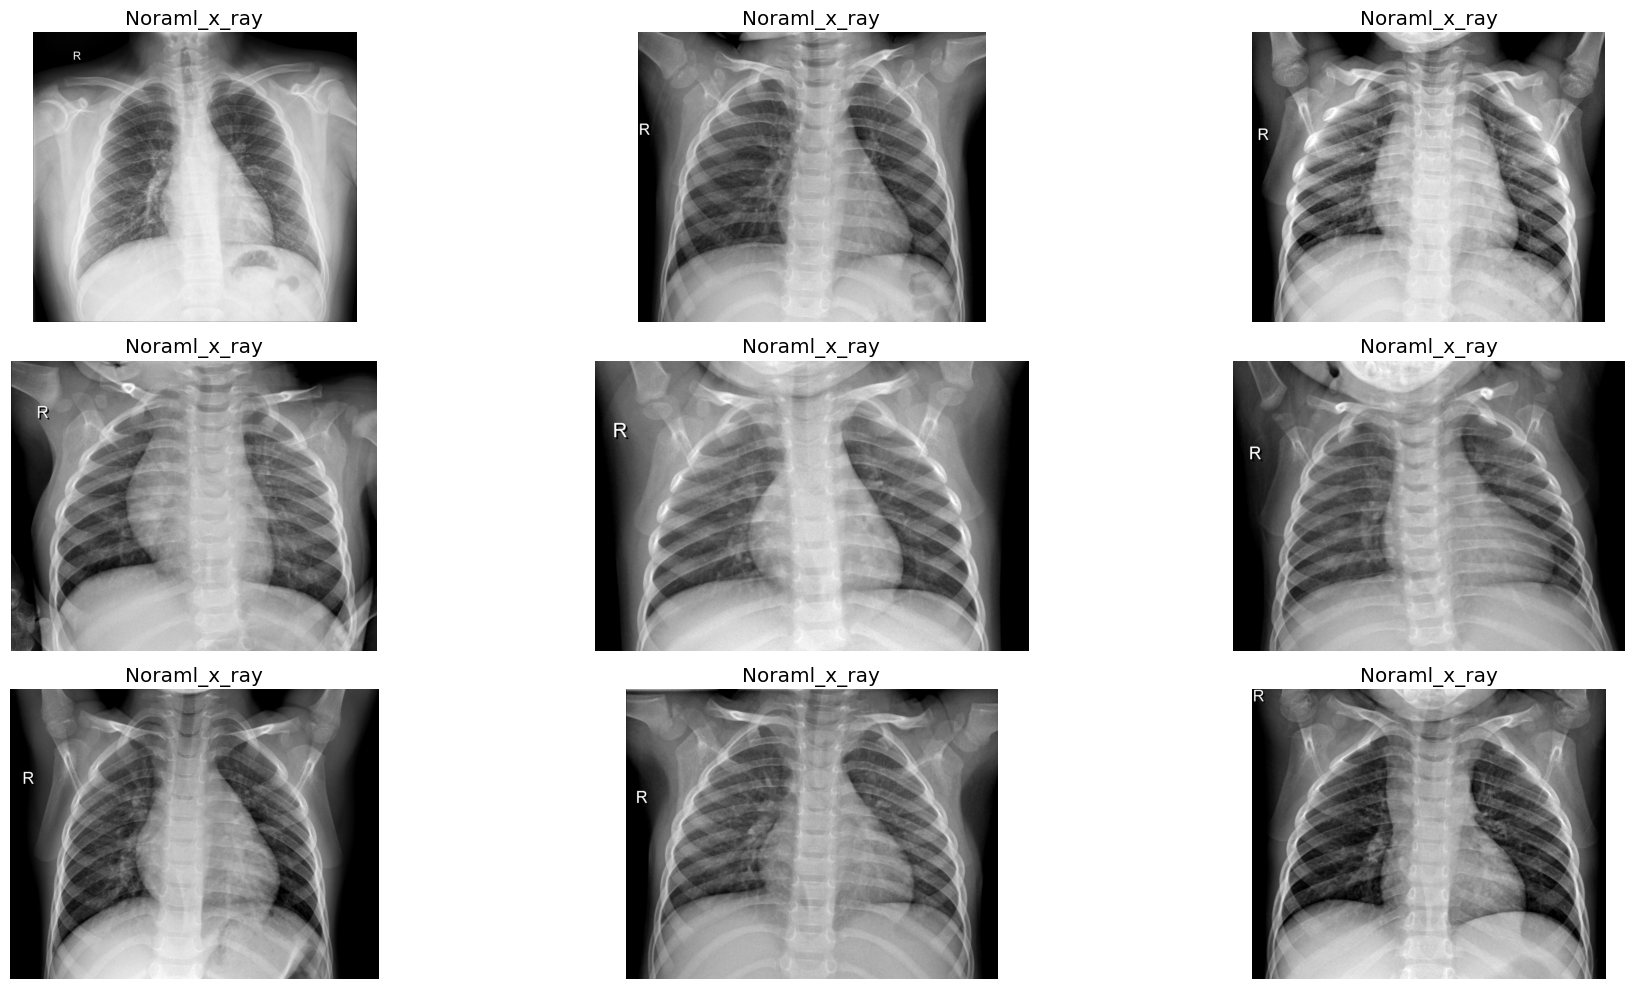

In [ ]:
plt.figure(figsize=(20,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  img=plt.imread(os.path.join(Normal_dir,Normal[i]))
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  plt.title("Noraml_x_ray")
plt.tight_layout()

['Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia'

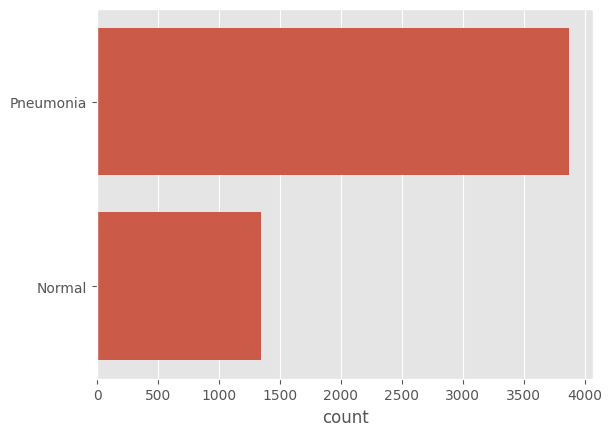

In [ ]:
listx=[]
for i in train:
  if i[1]==0:
    listx.append("Pneumonia")
  else:
    listx.append("Normal")
sns.countplot(listx)
print(listx)

In [ ]:
#Data Augumentation & Resizing

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,load_model

from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D,Dropout

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=0.4,
                                 vertical_flip=0.4,
                                 shear_range=0.2,
                                 width_shift_range=0.4,
                                 height_shift_range=0.4,
                                 fill_mode="nearest")

valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/train",
                                                  batch_size=32,
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=42,
                                                  color_mode='rgb')

Found 5216 images belonging to 2 classes.


In [ ]:
valid_generator=valid_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/val",
                                                  batch_size=32,
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=42,
                                                  color_mode='rgb')

Found 16 images belonging to 2 classes.


In [ ]:
class_labels=train_generator.class_indices

In [ ]:
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
class_name={value:key for (key,value) in class_labels.items()}
class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [ ]:
#VGG19  CNN Architecture

In [ ]:
base_model=VGG19(input_shape=(128,128,3),
                 include_top=False,
                 weights='imagenet')

for layer in base_model.layers:
  layer.trainable=False

x=base_model.output
flat=Flatten()(x)
class_1=Dense(4608,activation='relu')(flat)
dropout=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(dropout)
output=Dense(2,activation='softmax')(class_2)
model_01=Model(base_model.inputs,output)
model_01.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4608)           │    37,753,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 43,065,218 (164.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
filepath="model.keras"
es=EarlyStopping(monitor="val_loss",verbose=1,mode="min",patience=4)
cp=ModelCheckpoint(filepath,monitor="val_loss",save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
lrr=ReduceLROnPlateau(monitor="val_accuracy",patience=3,verbose=1,factor=0.5,mil_l=0.0001)
sgd=SGD(learning_rate=0.0001,decay=1e-6 ,momentum=0.1,nesterov=True)
model_01.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
history_01=model_01.fit(train_generator,
                        steps_per_epoch=50,
                        epochs=1,
                        callbacks=(es,cp,lrr),
                        validation_data=valid_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 623ms/step - accuracy: 0.7409 - loss: 0.6011 - val_accuracy: 0.5000 - val_loss: 0.8208 - learning_rate: 1.0000e-04


In [ ]:
pip install accelerate

In [ ]:
if not os.path.isdir('model_weightd/'):
  os.mkdir("model_weights/")
  model_01.save(filepath="model_weights/vgg19_model_01.h5",overwrite=True)

In [ ]:
test_generator=test_datagen.flow_from_directory("/content/chest-xray-pneumonia/chest_xray/test",
                                                  target_size=(128,128),
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=42,
                                                  color_mode='rgb')

Found 624 images belonging to 2 classes.


In [ ]:
test_datagen

In [ ]:
model_01.load_weights("model_weights/vgg19_model_01.h5")
vgg_val_eval_01=model_01.evaluate(valid_generator)
vgg_test_eval_01=model_01.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5000 - loss: 0.8208
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.6308 - loss: 0.6552


In [ ]:
print(f"Validation loss:{vgg_val_eval_01[0]}")
print(f"Validation Accuracy:{vgg_val_eval_01[1]}")
print(f"Test Loss: {vgg_test_eval_01[0]}")
print(f"Test Accuacracy: {vgg_test_eval_01[1]}")

Validation loss:0.8207992911338806
Validation Accuracy:0.5
Test Loss: 0.6537064909934998
Test Accuacracy: 0.625


In [ ]:
request={
    "files":{
        "file":[[1,2,3],4,5,6]
    }
}

request["files"]["file"]

[[1, 2, 3], 4, 5, 6]